In [55]:
import warnings
warnings.filterwarnings('ignore') 


# Importing essentials

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Read data

In [4]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data analysis

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [63]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Checking the missing values in each col

In [57]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Handling missing values

In [54]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna('unknown', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Data visualization

### plot showing survival rate by gender

### plot showing survival rate by class

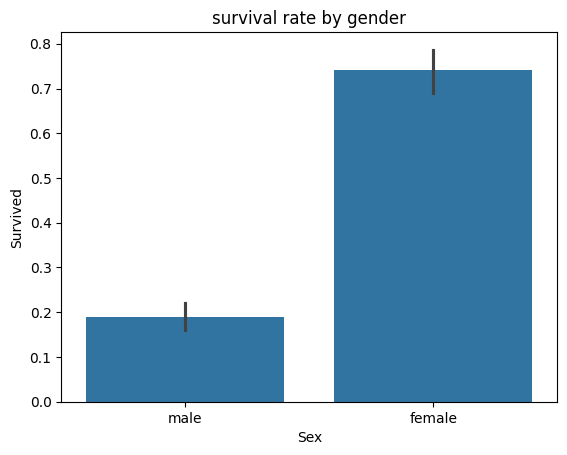

In [7]:
sns.barplot(x='Sex',y='Survived',data=df)
plt.title('survival rate by gender')
plt.show()

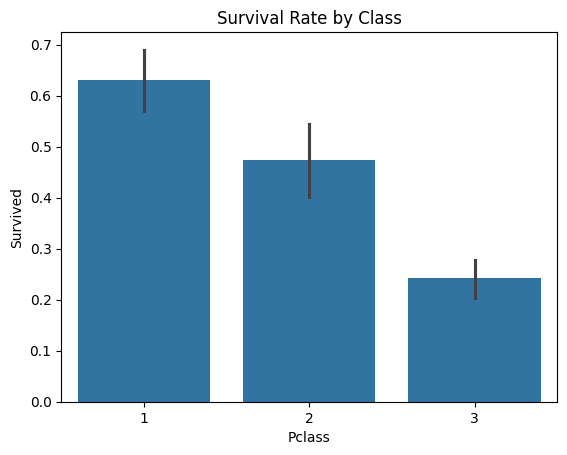

In [29]:
# Plot survival rate by class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()

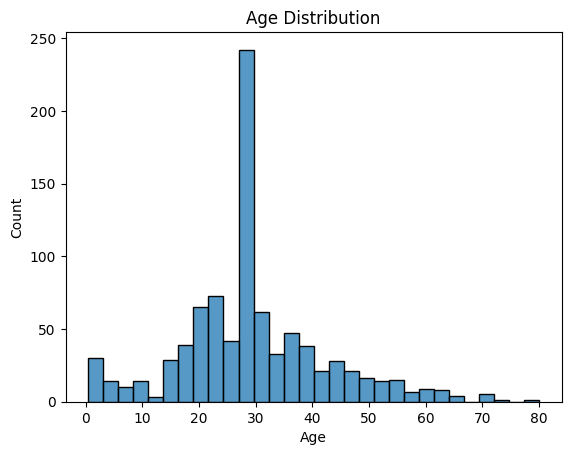

In [64]:
sns.histplot(x=df["Age"],bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

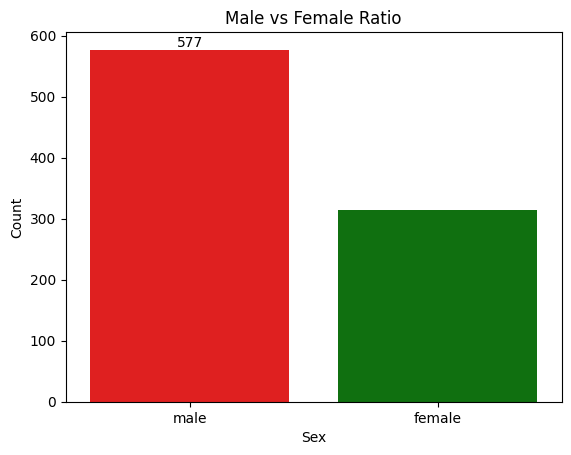

In [65]:
data3=df["Sex"].value_counts().reset_index()
data3.columns=["Sex","Count"]
bar3=sns.barplot(x=data3["Sex"],y=data3["Count"],palette=['r','g','y'])
bar3.bar_label(bar3.containers[0])
plt.title("Male vs Female Ratio")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

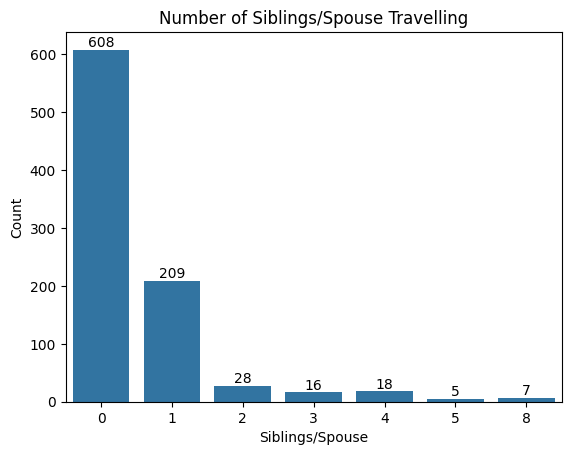

In [74]:
data5=df["SibSp"].value_counts().reset_index()
data5.columns=["SibSp","Count"]
bar5=sns.barplot(x=data5["SibSp"],y=data5["Count"])
bar5.bar_label(bar5.containers[0])
plt.title("Number of Siblings/Spouse Travelling")
plt.xlabel("Siblings/Spouse")
plt.ylabel("Count")
plt.show()

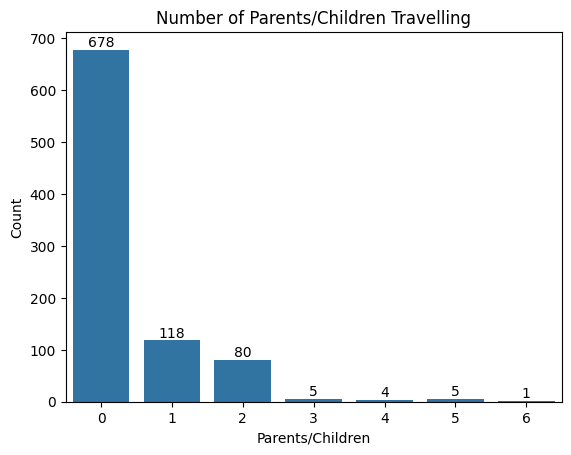

In [75]:
data6=df["Parch"].value_counts().reset_index()
data6.columns=["Parch","Count"]
bar6=sns.barplot(x=data6["Parch"],y=data6["Count"])
bar6.bar_label(bar6.containers[0])
plt.title("Number of Parents/Children Travelling")
plt.xlabel("Parents/Children")
plt.ylabel("Count")
plt.show()

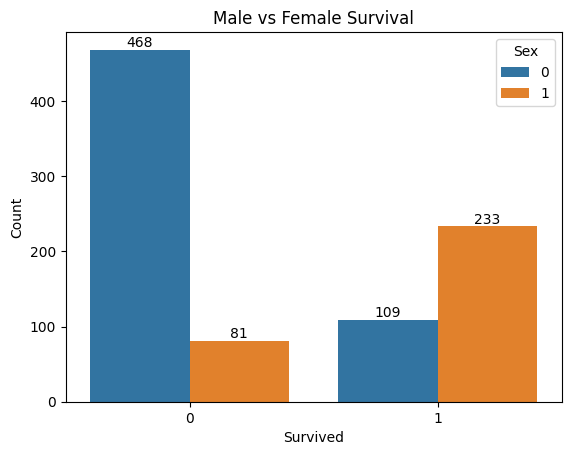

In [77]:
data8=df[["Survived","Sex"]].value_counts().reset_index()
data8.columns=["Survived","Sex","Count"]
bar8=sns.barplot(x=data8["Survived"],y=data8["Count"],hue=data8["Sex"])
bar8.bar_label(bar8.containers[0])
bar8.bar_label(bar8.containers[1])
plt.title("Male vs Female Survival")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

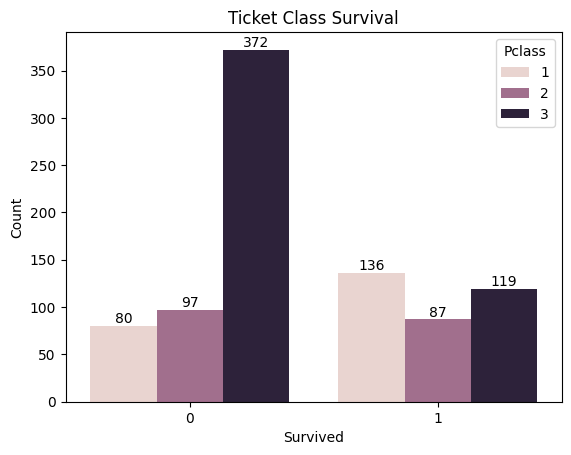

In [78]:
data9=df[["Survived","Pclass"]].value_counts().reset_index()
data9.columns=["Survived","Pclass","Count"]
bar9=sns.barplot(x=data9["Survived"],y=data9["Count"],hue=data9["Pclass"])
bar9.bar_label(bar9.containers[0])
bar9.bar_label(bar9.containers[1])
bar9.bar_label(bar9.containers[2])
plt.title("Ticket Class Survival")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

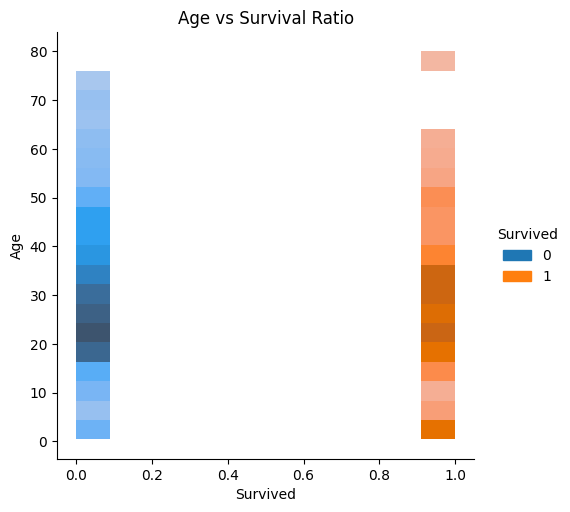

In [79]:
sns.displot(x=df["Survived"],y=df["Age"],hue=df["Survived"])
plt.title("Age vs Survival Ratio")
plt.show()

# Feature engineering

In [34]:
# Binning Age
df['Age_bin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])

# Binning Fare
df['Fare_bin'] = pd.cut(df['Fare'], bins=[-1, 7.91, 14.454, 31, 513], labels=['Low', 'Mid', 'High', 'Very High'])

# One-hot encode the new bins
df = pd.get_dummies(df, columns=['Age_bin', 'Fare_bin'], drop_first=True)


In [35]:
# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create a binary feature indicating whether someone is alone
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


In [69]:
import pandas as pd

# Load the dataset

df = pd.read_csv('Titanic-Dataset.csv')

# Check initial columns
print("Initial columns:", df.columns)

# Extract titles from the Name column
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare titles with 'Rare' and group similar titles
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
                                    'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Convert 'Sex' into numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Binning Age
df['Age_bin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])

# Binning Fare
df['Fare_bin'] = pd.cut(df['Fare'], bins=[-1, 7.91, 14.454, 31, 513], labels=['Low', 'Mid', 'High', 'Very High'])

# One-hot encode the new bins
df = pd.get_dummies(df, columns=['Age_bin', 'Fare_bin'], drop_first=True)

# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create a binary feature indicating whether someone is alone
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# One-hot encode the titles
df = pd.get_dummies(df, columns=['Title'], drop_first=True)

# Create a binary feature indicating if a cabin number is present
df['HasCabin'] = (df['Cabin'] != 'Unknown').astype(int)

# Extract the deck from the Cabin number
df['Deck'] = df['Cabin'].str[0]
df['Deck'] = df['Deck'].fillna('U')  # U for unknown

# One-hot encode the deck information
df = pd.get_dummies(df, columns=['Deck'], drop_first=True)

# Drop the original 'Cabin' column as it's now redundant
df.drop(['Cabin'], axis=1, inplace=True)

# Display the first few rows of the processed DataFrame
print("Processed DataFrame:")
print(df.head())


Initial columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Processed DataFrame:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S  \
0         0       3    0  22.0      1      0   7.2500       False        True   
1         1       1    1  38.0      1      0  71.2833       False       False   
2         1       3    1  26.0      0      0   7.9250       False        True   
3         1       1    1  35.0      1      0  53.1000       False        True   
4         0       3    0  35.0      0      0   8.0500       False        True   

   Age_bin_Teen  ...  Title_Rare  HasCabin  Deck_B  Deck_C  Deck_D  Deck_E  \
0         False  ...       False         1   False   False   False   False   
1         False  ...       False         1   False    True   False   False   
2         False  ...       False         1   False   False   False   False   
3         

# Model building

### Split the data into training and testing sets:

In [70]:
# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train a machine learning model:

In [71]:
# Instantiate and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# Model Evaluation and Interpretation

#### Feature Importance:

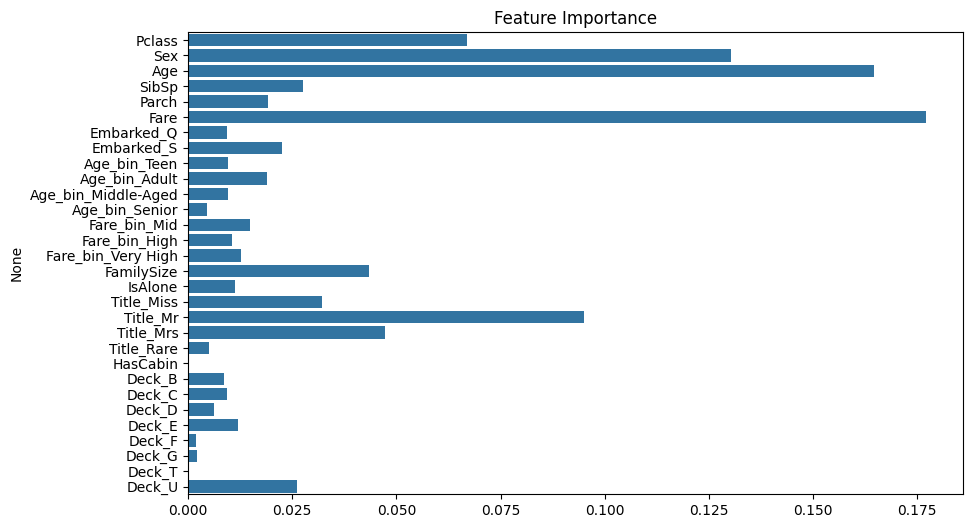

In [40]:
# Plot feature importance
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.show()


### Hence the prediction completed